# <span style="color:purple">Prerequisite Knowledge Check</span>

This is a short self-assessment to help you decide if you have the prerequisite knowledge for the course. This is not a timed test nor there are passing or failing scores. Feel free to use the internet (especially existing StackOverflow answers and package documentation) to help you get through this assessment. If you can answer all of these questions, you will have the appropriate prerequisite knowledge to be successful in the course.

---
# <span style="color:orange">Section 1: Python Programming Questions</span>

The class requires basic programming skills in Python and some familiarity with a number of Python libraries. Among these are: 

- Basic Python syntax: Data Types, Lists, Dictionaries, Operators (http://openbookproject.net/thinkcs/python/english3e/index.html)
- Flow control: Loops, conditional statements, Function (http://openbookproject.net/thinkcs/python/english3e/index.html)
- Numpy: Arrays, indexing, slicing, vectorization of operations (http://openbookproject.net/thinkcs/python/english3e/index.html)
- Pandas: Data Frames, FileIO, Selection, Statistics, Grouping, Tables (https://pandas.pydata.org/getting_started.html) 
- Plotting with [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/)
- [Scipy](https://scipy.org/): Probability functions (`scipy.stats`), Optimization (`optim`)

If you need a python installation, we recommend [Anaconda](https://www.anaconda.com/).

---

## <span style="color:red">Question 1.1</span>

Below is some sample data about students selling different types of fruit. `sales` is a list of lists.  The lists in `sales` contain the name of the student who sold the fruit and the type of fruit which was sold.  So if Bernard sold an apple, then `(["Bernard","Apple"] in sales)==True`. Turn the data into a pandas dataframe and then use pandas to answer the following:

* How many apples did Anna sell?

* Who sold more Watermelons: Bernard or Daisy

* Who sold the most fruit?

* Which fruit was sold the most?

In [1]:
import numpy as np
np.random.seed(0)
N = 1000
students = ['Anna','Bernard','Charlie','Daisy']
fruits = ['Apple','Peach','Watermelon']
sales = [ [np.random.choice(students), np.random.choice(fruits)] for j in range(N)]

## <span style="color:green">Solution</span>

In [2]:
import pandas as pd
from IPython.display import display
df = pd.DataFrame(sales, columns=['students','fruit'])
ctabed = df.groupby(['students','fruit']).size().unstack()
display(ctabed)
display(ctabed.sum(axis = 1))
display(ctabed.sum(axis = 0))

fruit,Apple,Peach,Watermelon
students,,,
Anna,79,97,85
Bernard,77,87,80
Charlie,89,79,62
Daisy,84,83,98


students
Anna       261
Bernard    244
Charlie    230
Daisy      265
dtype: int64

fruit
Apple         329
Peach         346
Watermelon    325
dtype: int64

## <span style="color:red">Question 1.2</span>

Shown below is data relating to the position of a car in meters. The data was recorded at the indicated times below (so at time = 1, the car was 1 meter from the starting position).  Load the data as a numpy array. Calculate the average speed at which the car was traveling between time points.  Do this with a loop and again using array slicing.

Hint: Speed = (Distance Traveled)/(Time To Travel Distance)

speeds: [0, 1, 1.2, 1.8, 2.0, 1.7, 1.5, 1.9, 2.1, 2.3]

times:  [0, 1, 1.5, 1.9, 2.3, 2.7, 3.8, 4.8, 5.4, 7.0]

## <span style="color:green">Solution</span>

In [3]:
import numpy as np

position = np.array([0, 1, 1.2, 1.8, 2.0, 1.7, 1.5, 1.9, 2.1, 2.3])
times = np.array([0, 1, 1.5, 1.9, 2.3, 2.7, 3.8, 4.8, 5.4, 7.0])

#With slicing
speed_vectorized = (position[1:] - position[:-1])/(times[1:] - times[:-1])

#Without slicing
speed = np.zeros(position.size - 1)
for i in range(speed.size):
    speed[i] = (position[i+1] - position[i])/(times[i+1] - times[i])
    
#Both are equivalent
np.isclose(speed,speed_vectorized, rtol = 1e-8).all()

True

## <span style="color:red">Question 1.3</span>

Generate a random 100-by-100 2-dimensional array of integers using `numpy.random.randint` ranging from 1 to 100.  To ensure your answer is the same as ours, set the random seed to `19920908`. 

Which row has the largest mean?

Which column has the smallest sum?

Which is the first column (from left to right) to have sum exceding 600?

Answer these questions without the use of a loop.

Hint: The `argmin`, `argmax`, and `argwhere` functions may be useful.


## <span style="color:green">Solution</span>

In [4]:
np.random.seed(19920908)

#The plus 1 here is tricky.
X = np.random.randint(low = 1, high = 10+1, size = (100,100))

#Which row has largest mean?

print(X.mean(axis = 1).argmax())

#Which column has smallest sum?

print(X.sum(axis = 0).argmin())

#Which is the first column (from left to right) to have sum exceeding 600?

print(np.argwhere((X.sum(axis = 0)>600)).min())

73
92
13


## <span style="color:red">Question 1.4</span>

Newton's method is a numerical method finding the roots of a function.  Newton's method is

$$ x_{n+1} = x_{n} - \dfrac{f(x_n)}{f'(x_n)} $$

Below, I've written a function to try to use Newton's method to find the two roots of the function $f(x) = \exp(-x)\ln(x+1) - 0.25$.

My function should:

* Terminate when $\vert f(x_n) \vert < 1\times10^{-8}$ or when the number of iterations exceeds 1000.

* Take as its first argument the starting point for the method (i.e $x_0$)

* Take as its second argument the function $f$

* Take as its third argument the function $f'$

My code, as it stands, does not return the right answer.  Look through the code and debug the function so that it returns answers similar to `scipy.optimize.newton`.  Please don't completely rewrite the code (I spent a long time on it and want to learn what I messed up!).


Don't worry about `f` and `fprime`.  I've ensured those are correct.


In [5]:
f = lambda x: np.exp(-x)*np.log(x+1) - 0.25
fprime = lambda x: -np.exp(-x)*np.log(x+1) + np.exp(-x)/(x+1)

def broken_newtons_method(x0,f, fprime, tol = 1e-8, maxiter = 1000):
    
    res = float('inf')
    iters = 0
    x_n = x0
    
    while (res<tol) and (iters<maxiter):
        
        x_n -= f(x_n)\fprime(x_n)
        
        res = abs(f(x_n))
        
    return x_n
        
    
print('My algorithm, starting at 0.01, yields answer: ',broken_newtons_method(0.01,f,fprime))
print('My algorithm, starting at 2, yields answer: ', broken_newtons_method(2,f,fprime))
        

#compare with scipy
from scipy.optimize import newton

print('scipy.optimize.newton starting at 0.01 returns ',newton(f,0.01))
print('scipy.optimize.newton returns at 2 returns ', newton(f,2))

SyntaxError: unexpected character after line continuation character (1473487198.py, line 12)

## <span style="color:green">Solution</span>

In [6]:
#Solution
f = lambda x: np.exp(-x)*np.log(x+1) - 0.25
fprime = lambda x: -np.exp(-x)*np.log(x+1) + np.exp(-x)/(x+1)


def true_newtons_method(x0,f, fprime, tol = 1e-8, maxiter = 1000):
    
    res = float('inf')
    iters = 0
    x_n = x0
    
    #Had the wrong sign in first  logical
    while (res>tol) and (iters<maxiter):
        
        #Wrong division 
        x_n -= f(x_n)/fprime(x_n)
        #No iteration update
        iters+=1
        res = abs(f(x_n))
    return x_n
        
from scipy.optimize import newton

print(true_newtons_method(0.01,f,fprime))
print(newton(f,0.01))

print(true_newtons_method(2,f,fprime))
print(newton(f,2))

0.5276739085063745
0.5276739085613994
1.0646697551062072
1.064669755082568


## <span style="color:red">Question 1.5</span>

Estimate through simulation the probability that a baseball player with a 0.300 batting average (that is, makes 300 hits for every 1000 at bats) hits fewer hits than a baseball player with a 0.275 batting average in 45 at bats.

Hint: Use the binomial distribution from `scipy.stats`.


## <span style="color:green">Solution</span>

In [7]:
from scipy.stats import binom
np.mean(binom(n = 45, p = .3).rvs(1_000_000) < binom(n = 45, p = 0.275).rvs(1_000_000))

0.351645

## <span style="color:red">Question 1.6</span>

The file `data.csv` lists the soccer players participated in the Soccer World Cup 2022. It contains attributes such as age, overall performance score, wage etc. Load this dataset as a pandas dataframe and use pandas methods to query it to find `Nationality`, `Wage`, `Value`, `Skill Moves`, `Overall` of `L. Messi`. 

## <span style="color:green">Solution</span>

In [18]:
data = pd.read_csv("data.csv")
player = 'L. Messi'
data[data.Name.str.contains(player)].get(["Name", "Nationality", "Wage", "Value", "Skill Moves", "Overall"])

,Name,Nationality,Wage,Value,Skill Moves,Overall
56,L. Messi,Argentina,€195K,€54M,4.0,91


## <span style="color:red">Question 1.7</span>

The feature `Overall` indicates player's overall performance score, which normally ranges from 0 to 100. Plot the smoothed distribution of `Overall`. Your plot must also include three vertical lines: one for mean, one for median, and one for 99th percentile of the distribution. Your plot must have a legend.

## <span style="color:green">Solution</span>

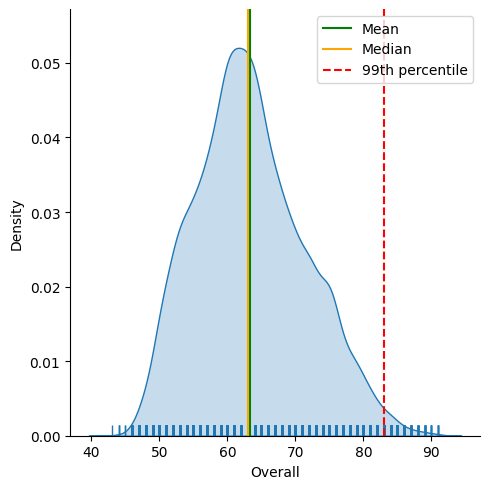

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data.Overall, kind='kde', fill=True, rug = True)

plt.axvline(data.Overall.mean(), color='green', label='Mean')
plt.axvline(data.Overall.median(), color='orange', label='Median')

percentile = 99
quantile=percentile/100

plt.axvline(data.Overall.quantile(quantile), color='r', ls='--', label=str(percentile)+'th percentile')
plt.legend(loc='upper right')
plt.show()

## <span style="color:red">Question 1.8</span>

What is `Name`, `Nationality`, `Wage`, `Value`, `Skill Moves`, and `Overall` of the top 0.06% players of the `Overall` distribution?

## <span style="color:green">Solution</span>

In [13]:
print('Top players are:')
percentile = 100-0.06
quantile=percentile/100
data[data.Overall > data.Overall.quantile(quantile)].get(["Name", "Age", "Nationality", "Wage", "Value", "Position", "Overall"])

Top players are:


,Name,Age,Nationality,Wage,Value,Position,Overall
3,K. De Bruyne,31,Belgium,€350K,€107.5M,RCM,91
25,M. Salah,30,Egypt,€270K,€115.5M,RW,90
41,R. Lewandowski,33,Poland,€420K,€84M,ST,91
56,L. Messi,35,Argentina,€195K,€54M,RW,91
75,K. Mbappé,23,France,€230K,€190.5M,ST,91
100,Cristiano Ronaldo,37,Portugal,€220K,€41M,ST,90
124,K. Benzema,34,France,€450K,€64M,CF,91
192,V. van Dijk,30,Netherlands,€230K,€98M,LCB,90
9151,M. Neuer,36,Germany,€72K,€13.5M,GK,90
14357,T. Courtois,30,Belgium,€250K,€90M,GK,90


## <span style="color:red">Question 1.9</span>

Attributes `Value` and `Wage` appear to be categorical attributes, but we need pure numbers for them. Do the following:
-   remove any possible white spaces as well as the "€" symbol from their entries,
-   some of their entries contain a "K" and some an "M". Multiply the "K" ones by 1e+3 and the "M" ones by 1e+6.

## <span style="color:green">Solution</span>

In [19]:
monetary = ['Value','Wage']
for c in monetary:
    data[c] = data[c].str.replace(' ', '_')
    data[c] = data[c].str.replace('€', '')
    ind_K = data[data[c].str.contains('K', regex=False)].index
    ind_M = data[data[c].str.contains('M', regex=False)].index
    data[c] = data[c].str.replace('K', '')
    data[c] = data[c].str.replace('M', '')
    data[c] = data[c].astype(float)

    data.loc[ind_K, c] = data[c].apply(lambda x: x*1e+3)
    data.loc[ind_M, c] = data[c].apply(lambda x: x*1e+6)

data.get(["Wage", "Value"]).head()

,Wage,Value
0,115000.0,91000000.0
1,190000.0,78500000.0
2,46000.0,46500000.0
3,350000.0,107500000.0
4,110000.0,89500000.0


---
# <span style="color:orange">Section 2: Statistics Questions</span>

Students should be familiar with the following concepts: 
- Events and probability   
- Discrete and continuous random variables 
- Probability mass, probability density, and cumulative distribution functions 
- Joint, marginal, and conditional probability distributions
- Prior and posterior probability, Bayes rule 
- Maximum likelihood estimation
- Central limit theorem and normal approximation
- Confidence intervals 
- Mean, median, variance, standard deviation 
- Linear regression 

---

## <span style="color:red">Question 2.1</span>

What is the correct interpretation of the 95% confidence interval?

A. There is a 95% probability the true mean lies outside your interval.

B. The probability of the alternative hypothesis being true is 95%.

C. There is a 95% probability that the mean is the midpoint of the interval

D. Upon repeated construction, the longterm relative frequency of 95% confidence intervals containing the true mean is 95%.

## <span style="color:green">Solution</span>

D

## <span style="color:red">Question 2.2</span>

Bill James is credited with creating sabermetrics (baseball analytics). In one of his early "Baseball Abstracts", Bill writes:

"If you see 15 games a year, there is a 40% chance that a .275 hitter will have more hits than a .300 hitter."

Bill refers to players by their *batting average* (i.e. .275 means the hitter will hit the ball 275 times for every 1000 times they come at bat).  The actual probability is quite smaller than that. Bill wrote this in the late 1970s without the ubiquity of computers to perform the simulations we can.  It is quite plausible that Bill used a Normal approximation to arrive at this conclusion.

Assuming that every batter appears 3 times per game for 15 games (for a total of 45 at bats), use a Normal approximation to estimate the probability that a .275 batter hits more hits than a .300 batter.  Assume the batters are independent.  You can use python to evaluate any complicated functions, but do not estimate the probability via simulation.

## <span style="color:green">Solution</span>

Let $A \sim Binom(0.275,45)$ and $B \sim Binom(0.300,45)$.  

We are looking for $p(A>B)$ or alternatively $p(0<A-B)$.

The expectation of $A-B$ is $E(A-B) = E(A) - E(B)  \approx 1.12$

The variance of $A-B$ is $\operatorname{Var}(A-B) = \operatorname{Var}(A) + \operatorname{Var}(B) - 2\operatorname{Cov}(A,B)$.

Since batters are assumed to be independent, $\operatorname{Cov}(A,B) = 0$.

So the variance is then $\operatorname{Var}(A) + \operatorname{Var}(B) \approx 18.42$

The Normal approximation is then $A-B \sim \mathcal{N}(1.12, 18.42)$

and so the probability that $A-B>0$ is $1- \mathbf{\Phi}(0) \approx 0.4$

Where $\mathbf{\Phi}$ is the CDF for our normal approximation.



In [ ]:
from scipy.stats import norm


norm(loc = 1.12, scale = np.sqrt(18.42)).cdf(0)

## <span style="color:red">Question 2.3</span>

A diagnostic test has a 99% chance of correctly labeling a person as sick if they are truly sick.  The probability that the test labels someone as sick, regardless of disease status is 50%.  Approximately 1% of the population has the disease. 

a) what is the joint probability of having the disease and a positive test? 

b) what is the marginal probability that a test comes back positive? 

c) what is the conditional probability that a person has the disease if their test comes back positive?

## <span style="color:green">Solution</span>

a) The joint probability of two events happening is $p(A,B) = p(A)p(B|A)$

$$ p(D+ , T+)  = p(D+) p(T+ \vert D+) = 0.01 \times 0.99 =  0.0099 $$

b) The marginal probability is 

$$ p(T+) = p(D+)p(T+|D+) + p(D-) p(T+|D-) = 0.5049$$

c) The conditional probability of this even can be obtained by Bayes Rule: 

$$ p(D+ \vert T+)  = \dfrac{p(T+ \vert D+) p(D+) }{p(T+)} = \dfrac{0.0099}{0.5049} = 0.0196$$

The probability of a positive disease state after a positive test is $~1.96\%$ 

## <span style="color:red">Question 2.4</span>

Why might someone want to know the median rather than the mean of their data?

## <span style="color:green">Solution</span>

The median is far less sensitive to outliers than the mean.  If the data have many outliers, then the mean might not be a good measure of central tendency.

## <span style="color:red">Question 2.5</span>

You obtain a dataset with $n$ rows and $n$ columns (the same number of rows and columns). Each column houses numeric data (no categories, just numbers). You're asked to perform a linear regression this data (the outcome is in a different file.  It is not one of the $n$ columns).  Assume that the data matrix is full rank.

What will the $R^2$ of this regression be?

## <span style="color:green">Solution</span>

$R^2$ will be one since the problem is perfectly determined.

---
# <span style="color:orange">Section 3: Linear Algebra Questions</span>

For the class we require some basic linear algebra
- Vectors, matrices, inner products, outer products, matrix multiplication
- Eigenvectors, eigenvalues, rank 
- Matrix inversion 
- Norms 

Gilbert Strang's book (http://math.mit.edu/~gs/linearalgebra/) might be a good refresher should you need it. Here (http://vmls-book.stanford.edu/vmls.pdf) is another book which may cover the topics you need, though we have not verified its quality.  If you have taken MATH 1600 and/or AMATH 2811, that should be enough.

---

## <span style="color:red">Question 3.1</span>

If $A$ $n \times n$ is a matrix, and $A$ has full rank, is $A$ invertible?

## <span style="color:green">Solution</span>

Yes.

## <span style="color:red">Question 3.2</span>

If a matrix, $A$, is positive definite, which of the following is false:

A) $\mathbf{x}^T A \mathbf{x} >0 $ for every vector which is not 0

B) Every element of A is positive

C) The Eigenvalues of A are positive

D) A is symmetric

## <span style="color:green">Solution</span>

B

## <span style="color:red">Question 3.3</span>

Let $x$ and $y$ be vectors such that $\vert x \vert = 3$ and $\vert y \vert = 4$.  Use the triangle inequality to put an upper bound on the length of $\vert x+y \vert$.


## <span style="color:green">Solution</span>

$\vert x+y \vert \leq \vert x \vert + \vert y \vert =7$

## <span style="color:red">Question 3.4</span>

Let $A$ be a matrix, and let $\mathbf{x},\mathbf{y}$ be vectors.  If $A\mathbf{x} = [4,3,2]^T$ and $A\mathbf{y} = [-1,2,0]^T$ what is $A(2\mathbf{x} - \mathbf{y})$?

## <span style="color:green">Solution</span>

$A(2\mathbf{x} - \mathbf{y}) = 2A\mathbf{x} - A\mathbf{y} = [8,6,4]^T - [-1,2,0]^T = [9,8,4]^T$

---